In [1]:
from pylab import *
from scipy.integrate import odeint
from scipy.optimize import brentq
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

In [292]:
### Define Constants ###
dx = 1000 # number of points (resolution on Distance(x-axis))
dE = 1000 # number of points (resolution on Energy(y-axis))

h = 6.62607015e-34
h_bar = h/(2*np.pi) #Planck's constant
m_e = 9.1093837e-31 #Static electron mass

In [465]:
### Define Potential ###
Total_length = 2.75
V_max = -8

def V(x):
    if x == 0 or x == 2.75:
        return -999
    elif 0.75<=x<=1.25:
        return -8
    elif 1.5<=x<=2:
        return -8
    else:
        return 0

#notmalize potential into list
V_array = []
x_axis = np.linspace(0, Total_length, dx) #define array for x-axis
for i in x_axis:
    V_array.append(V(i))

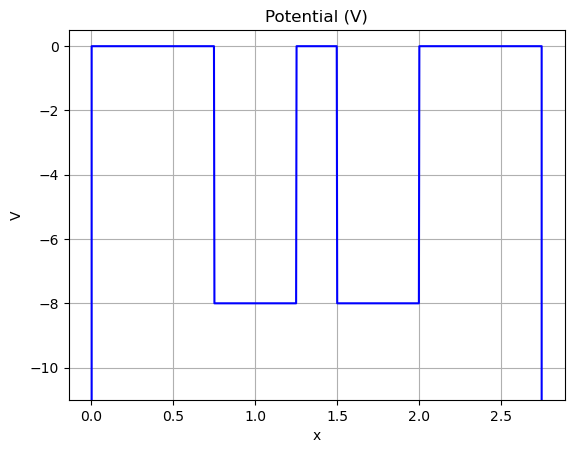

In [471]:
### Plot potential ###
def plot_potential(x_axis, V_array):
    plt.plot(x_axis,V_array, "b")
    plt.title('Potential (V)')
    plt.xlabel('x')
    plt.ylabel('V')
    plt.grid(True)
    plt.show(ylim([V_max-3, 0.5]))

plot_potential(x_axis, V_array)

### Schrodinger Equation (1D):
$$
-\frac{\hbar}{2m} \frac{d^{2}}{dx^{2}} \psi(x) + V(x)\psi  (x) =  E \psi (x)
$$
$$
\hat{H} \psi (x) = \vec{E} \psi(x)
$$
$$
\frac{d^{2}}{dx^{2}} \psi(x) = \frac{2m(V(x) - E_{n})}{\hbar ^ {2}}\psi(x) 
$$
#### Boundary Condition:
1. Energy must converage:
$$ \psi(x \rightarrow +\infty) = 0 $$

In [467]:
u0 = [0, -np.pi] #intial value at x = 0

def right_eq (u, x, E, V):
    
    return [u[1], 2*(E-V(x))*u[0]]

def left_eq (E):
    
    return odeint (right_eq, u0, x_axis, args = (E,V))

def right_boundary (E):
    
    return left_eq(E)[:, 0][dx-1]

# #testing
# u0 = [0, 1]
# left_eq(E)[:, 0][dx-1]

In [468]:
root = []
eigen_states = 5 #sum of eigen_states want to locate
Energy = np.linspace (0, V_max, dE)

start = 0
end = 0
for i in Energy:
    try:
        tmp_root = brentq(right_boundary, start, end) #find all energy eigenvalues when the wavefunction psi = 0 at right boundary
        start = tmp_root + V_max/dE
        if round(tmp_root,6) not in root:
            root.append(round(tmp_root,6))
    except:
        end = i
    else:
        print("solution found")
        if len(root) >= eigen_states:
            break
root

solution found
solution found
solution found


[-4.225318, -4.717941, -7.96228]

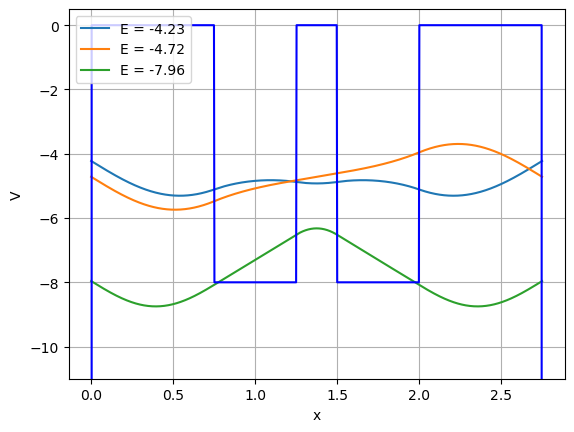

In [470]:
for i in root:
    plt.plot(x_axis, left_eq (i)[:, 0] + i, label= "E = {0}".format(round(i,2)))
    #plt.plot(x_axis, left_eq (i)[:, 1] + i, 'g', label= "u'(x)")
plt.plot(x_axis,V_array, "b")
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('V')
plt.grid()
plt.show(ylim([V_max-3, 0.5]))